## Task: Train a logistic regression classifier to predict survival of passengers in titanic dataset

You are provided with code to download and load titanic dataset in the form of a csv

In the dataset, each row represents information about the passengers of titanic, Like their name, gender, class etc(See the dataframe below for more info).

The target column is 'Survived' which tells us whether this particular passenger sirvived or not

Use any of all the other columns as the input features (You can choose to drop the columns you see are not worth keeping).

Your task is to train a logistic regression model which takes the input featues (make sure to not accidentaly feed the 'Survived' column to the model as input) and predicts the whether a passenger with these features would survive or not.

Make sure to put emphasis on code quality and to include a way to judge how good your model is performing on **un-seen data (untrained data)**.

As a bonus, see if you can figure out which feature is most likely to affect the survivability of a passenger.

In [1]:
from IPython.display import clear_output

In [2]:
#Don't change this code

%pip install gdown==4.5

clear_output()

In [3]:
!gdown 18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK  # Download the csv file.

Downloading...
From: https://drive.google.com/uc?id=18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK
To: /content/titanic.csv
100% 60.3k/60.3k [00:00<00:00, 47.2MB/s]


In [209]:
import pandas as pd
import matplotlib.pyplot as plt

In [210]:
titanic_data = pd.read_csv('titanic.csv')

In [211]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [212]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [213]:
def normalize(df):
  return (df-df.mean())/df.std()

In [214]:
titanic_data.drop('Name', axis=1, inplace=True)
titanic_data.drop('Ticket', axis=1, inplace=True)
titanic_data.drop('Cabin', axis=1, inplace=True)

In [215]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [216]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [217]:
"""
Male: 0
Female: 1


"""

titanic_data['Sex'] = titanic_data['Sex'].apply(lambda toLabel: 0 if toLabel == 'male' else 1)
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

titanic_data["Embarked"].replace('S', 0, inplace=True)
titanic_data["Embarked"].replace('C', 1, inplace=True)
titanic_data["Embarked"].replace('Q', 2, inplace=True)
titanic_data['Embarked'].fillna(int(titanic_data['Embarked'].mean()), inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


In [218]:
titanic_data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


In [219]:
titanic_data.drop('PassengerId', axis=1, inplace=True)
# titanic_data.drop('Age', axis=1, inplace=True)
# titanic_data.drop('SibSp', axis=1, inplace=True)
# titanic_data.drop('Parch', axis=1, inplace=True)

In [220]:
data_y = titanic_data['Survived']
data_x = titanic_data.drop(columns=['Survived'])

In [221]:
data_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,38.000000,1,0,71.2833,1.0
2,3,1,26.000000,0,0,7.9250,0.0
3,1,1,35.000000,1,0,53.1000,0.0
4,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0.0
887,1,1,19.000000,0,0,30.0000,0.0
888,3,1,29.699118,1,2,23.4500,0.0
889,1,0,26.000000,0,0,30.0000,1.0


In [222]:
data_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [224]:
data_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,38.000000,1,0,71.2833,1.0
2,3,1,26.000000,0,0,7.9250,0.0
3,1,1,35.000000,1,0,53.1000,0.0
4,3,0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0.0
887,1,1,19.000000,0,0,30.0000,0.0
888,3,1,29.699118,1,2,23.4500,0.0
889,1,0,26.000000,0,0,30.0000,1.0


In [225]:
#USING PYTORCH

In [226]:
import torch
import torch.nn as nn
from torch.optim import SGD

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [227]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test  = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

In [228]:
class LogisticRegression(nn.Module):
  def __init__(self, input_size):
    super(LogisticRegression, self).__init__()
    self.linear_weights = nn.Linear(input_size, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    y = self.linear_weights(x)
    z = self.sigmoid(y)
    return z

In [229]:
lr = 1e-2
num_epochs = 4000

input_size = X_train.shape[1]
model = LogisticRegression(input_size)

criterion = nn.BCELoss()
optimizer = SGD(model.parameters(), lr=lr)


In [230]:
y_train

tensor([1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
        1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
        0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
        0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
        1., 1., 1., 1., 0., 0., 0., 0., 

In [231]:
train_losses = []

for epoch in range(num_epochs):

  outputs = model(X_train)
  loss = criterion(outputs, y_train.unsqueeze(dim=-1))


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  train_losses.append(loss.item())

  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: 0.6547
Epoch [200/4000], Loss: 0.5854
Epoch [300/4000], Loss: 0.5417
Epoch [400/4000], Loss: 0.5131
Epoch [500/4000], Loss: 0.4938
Epoch [600/4000], Loss: 0.4803
Epoch [700/4000], Loss: 0.4705
Epoch [800/4000], Loss: 0.4633
Epoch [900/4000], Loss: 0.4578
Epoch [1000/4000], Loss: 0.4535
Epoch [1100/4000], Loss: 0.4501
Epoch [1200/4000], Loss: 0.4474
Epoch [1300/4000], Loss: 0.4452
Epoch [1400/4000], Loss: 0.4433
Epoch [1500/4000], Loss: 0.4418
Epoch [1600/4000], Loss: 0.4405
Epoch [1700/4000], Loss: 0.4394
Epoch [1800/4000], Loss: 0.4384
Epoch [1900/4000], Loss: 0.4376
Epoch [2000/4000], Loss: 0.4369
Epoch [2100/4000], Loss: 0.4363
Epoch [2200/4000], Loss: 0.4358
Epoch [2300/4000], Loss: 0.4353
Epoch [2400/4000], Loss: 0.4349
Epoch [2500/4000], Loss: 0.4345
Epoch [2600/4000], Loss: 0.4341
Epoch [2700/4000], Loss: 0.4338
Epoch [2800/4000], Loss: 0.4336
Epoch [2900/4000], Loss: 0.4333
Epoch [3000/4000], Loss: 0.4331
Epoch [3100/4000], Loss: 0.4329
Epoch [3200/4000]

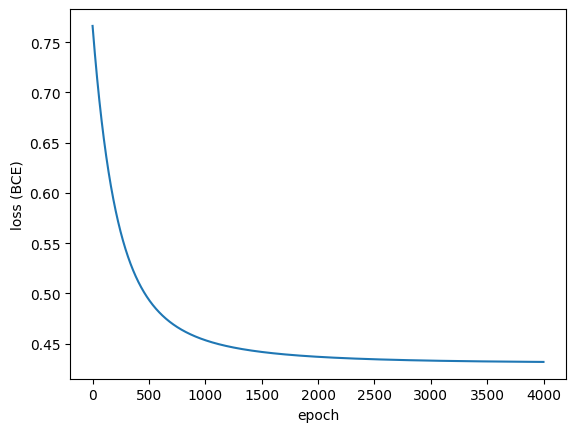

In [232]:
plt.plot(train_losses)

plt.xlabel('epoch')
plt.ylabel('loss (BCE)')

plt.show()


In [233]:
model.eval()
with torch.no_grad():

  y_pred_output = model(X_test)
  y_pred = (y_pred_output >= 0.5).float()  # Convert probabilities to binary predictions (0 or 1)

  correct = (y_pred == y_test.view(-1, 1)).sum().item()
  accuracy = correct / y_test.size(0)

  print(f'Accuracy on test set: {100 * accuracy:.2f}%')



  accuracy_score(y_test.numpy(), y_pred.numpy())
  print(f'Test Accuracy: {accuracy:.2%}')

Accuracy on test set: 79.33%
Test Accuracy: 79.33%
